In [2]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import *
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_theme(style='white', color_codes=True, palette='Blues_r')

In [15]:
# Loading stocks
FF_mom = pd.read_csv('mom_FF.csv', skiprows = 12, nrows=1128, index_col = 0)
FF_3 = pd.read_csv('FF_3.csv', skiprows = 2, nrows=1134, index_col = 0)


FF_mom.index = pd.to_datetime(FF_mom.index, format= '%Y%m')
FF_mom.index = FF_mom.index.to_period('M')
FF_mom.rename(columns={ FF_mom.columns[0]: "mom" }, inplace = True)

FF_3.index = pd.to_datetime(FF_3.index, format= '%Y%m')
FF_3.index = FF_3.index.to_period('M')

In [16]:
FF_mom = FF_mom[FF_mom.index > '1965-1']
FF_mom = FF_mom[FF_mom.index < '2020-12']
FF_mom=FF_mom/100
FF_3 = FF_3[FF_3.index > '1965-1']
FF_3 = FF_3[FF_3.index < '2020-12']
FF_3 = FF_3 /100

In [17]:
#FF_mom['1+mom'] = FF_mom['mom']+1
FF_mom['1+mom'] = (FF_mom['mom']+1) + FF_3['RF']
FF_mom['cum'] = FF_mom['1+mom'].cumprod() # Cumulative return

In [18]:
#FF_mom.reset_index(inplace=True)

In [19]:
FF_3['1+SMB'] = (FF_3['SMB']+1) + FF_3['RF']
#FF_3['1+SMB'] = FF_3['SMB']+1
FF_3['1+HML'] = (FF_3['HML']+1) + FF_3['RF']
#FF_3['1+HML'] = FF_3['HML']+1 
FF_3['cum_SMB'] = FF_3['1+SMB'].cumprod()
FF_3['cum_HML'] = FF_3['1+HML'].cumprod()

FF_3['cum_RF'] = (FF_3['RF']+1).cumprod()

In [20]:
FF_mom

,mom,1+mom,cum
1965-02,0.0030,1.0060,1.006000
1965-03,0.0010,1.0046,1.010628
1965-04,0.0254,1.0285,1.039430
1965-05,0.0054,1.0085,1.048266
1965-06,-0.0312,0.9723,1.019229
...,...,...,...
2020-07,0.0761,1.0762,546.264747
2020-08,0.0051,1.0052,549.105323
2020-09,0.0305,1.0306,565.907946
2020-10,-0.0303,0.9698,548.817526


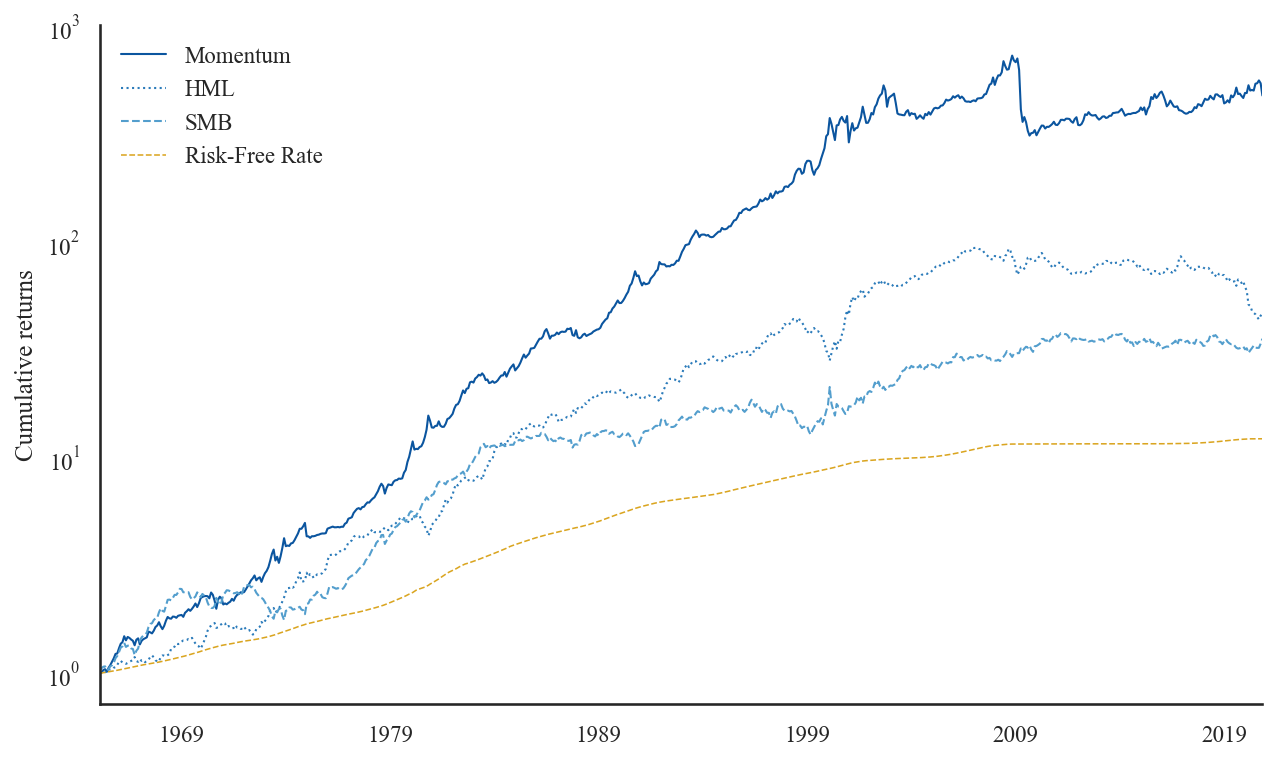

In [34]:
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
plt.rcParams["font.family"] = "Times New Roman"

#x_values = [dt.datetime.strptime(d,'%m-%d-%Y').date() for d in FF_mom.index]

figure(figsize=(10, 6), dpi=150)
ax = plt.gca()
FF_mom.plot(kind='line', y='cum',  linewidth=1, ax=ax)
FF_3.plot(kind='line', y='cum_HML', linewidth=1, linestyle='dotted', ax=ax)
FF_3.plot(kind='line', y='cum_SMB', linewidth=1, linestyle='dashed', ax=ax)
FF_3.plot(kind='line', y='cum_RF', linewidth=0.75, linestyle='dashed', color='goldenrod', ax=ax)
plt.ylabel("Cumulative returns")


#formatter = mdates.DateFormatter("%Y")
#ax.xaxis.set_major_formatter(formatter)
#x = mdates.MonthLocator(interval=6)
#ax.xaxis.set_major_locator(x)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log') 
plt.legend(['Momentum','HML', 'SMB', 'Risk-Free Rate'], loc = 'upper left', edgecolor='white',facecolor='white')